# PMDARIMA API Demonstration

This notebook introduces the PMDARIMA API for time-series forecasting.

It demonstrates:
- Working with a synthetic univariate time series
- Splitting time-series data into training and testing sets
- Initializing an ARIMA model using `pmdarima.auto_arima`
- Generating basic forecasts

This document focuses only on demonstrating the PMDARIMA API.

For detailed explanation, refer to the documentation file  
👉 [`pmdarima.API.md`](./pmdarima.API.md)

In [1]:
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline

import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

# Initialize logger
logging.basicConfig(level=logging.INFO)
_LOG = logging.getLogger(__name__)
_LOG.info("Starting PMDARIMA API demonstration notebook.")

INFO:__main__:Starting PMDARIMA API demonstration notebook.


## 1️⃣ Create a synthetic univariate time series

In [2]:
# Create a synthetic univariate time series for API demonstration
np.random.seed(0)
index = pd.date_range("2020-01-01", periods=200, freq="D")
series = pd.Series(np.random.randn(200).cumsum(), index=index)

print("Series length:", len(series))
series.head()

Series length: 200


2020-01-01    1.764052
2020-01-02    2.164210
2020-01-03    3.142948
2020-01-04    5.383841
2020-01-05    7.251399
Freq: D, dtype: float64

## 2️⃣ Split data into training and testing sets

In [3]:
train, test = series[:160], series[160:]

print("Train size:", len(train), " | Test size:", len(test))

Train size: 160  | Test size: 40


## 3️⃣ Train PMDARIMA model
We’ll use the `auto_arima()` API to automatically select the best ARIMA parameters 
based on AIC/BIC scores.

In [5]:
# Fit an Auto-ARIMA model
_LOG.info("Training PMDARIMA model...")

model = pm.auto_arima(
    train,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    error_action="ignore",
    trace=False
)

_LOG.info("Model training completed.")
print(model.summary())

INFO:__main__:Training PMDARIMA model...
INFO:__main__:Model training completed.


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  160
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -228.052
Date:                Thu, 18 Dec 2025   AIC                            458.104
Time:                        23:13:54   BIC                            461.173
Sample:                    01-01-2020   HQIC                           459.351
                         - 06-08-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.0312      0.133      7.734      0.000       0.770       1.292
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.39
Prob(Q):                              0.78   Pr

## 4️⃣ Forecast on test data
We generate a forecast for the next N steps, where N equals the length of the test segment.

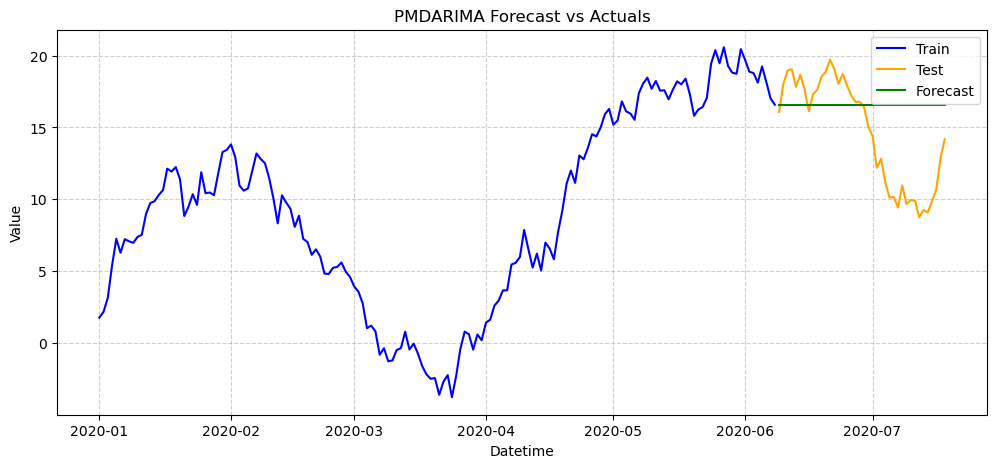

In [7]:
n_periods = len(test)
forecast = model.predict(n_periods=n_periods)
forecast_index = test.index

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
warnings.filterwarnings("ignore", category=FutureWarning, module="statsmodels")

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label="Train", color="blue")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(forecast_index, forecast, label="Forecast", color="green")
plt.title("PMDARIMA Forecast vs Actuals")
plt.xlabel("Datetime")
plt.ylabel("Value")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

## 5️⃣ Summary
This notebook demonstrates the PMDARIMA API workflow:

- Working with a univariate time series
- Model training using `auto_arima`
- Forecast generation and visualization

Project-specific datasets, preprocessing, and evaluation are demonstrated in `pmdarima.example.ipynb`.